In [ ]:
pip install removebg

  Preparing metadata (setup.py) ... done
  Created wheel for removebg: filename=removebg-0.4-py3-none-any.whl size=2551 sha256=3ef718bd6b252d111c3e33f1d07c87414ac28954350e63eff91d71c7d9d0e4e6
  Stored in directory: /root/.cache/pip/wheels/43/c1/87/a6e48d11fa9e7aca90972e135247b70ddc8a0b4af464ac566a
Successfully built removebg


In [ ]:
import pandas as pd
from removebg import RemoveBg
import requests
from io import BytesIO
from PIL import Image
import os

# Your API key
API_KEY = "rMbVtYrt9fbeyDrHr3VtDy3k"

# Initialize RemoveBg with your API key
rmbg = RemoveBg(API_KEY, "error.log")

# Load your DataFrame
df = pd.read_csv('/content/image_data - Copy of timestamps.csv')

# Directory to save processed images
output_dir = "/content/processed_images"
os.makedirs(output_dir, exist_ok=True)

# Iterate through the DataFrame starting from the 19th row and process each image
for index, row in df.iloc[18:].iterrows():  # Use iloc to start from the 19th row (index 18)
    image_url = row['ImageUrl']
    try:
        # Get the image from the URL
        response = requests.get(image_url)
        image = Image.open(BytesIO(response.content))

        # Save the image locally
        original_image_path = f"{output_dir}/original_image_{index}.png"
        image.save(original_image_path)

        # Use RemoveBg to remove the background
        rmbg.remove_background_from_img_file(original_image_path)

        print(f"Processed image {index} successfully.")

    except Exception as e:
        print(f"Error processing image {index}: {e}")

print("Background removal complete.")


Processed image 18 successfully.
Processed image 19 successfully.
Processed image 20 successfully.
Processed image 21 successfully.
Processed image 22 successfully.
Processed image 23 successfully.
Processed image 24 successfully.
Processed image 25 successfully.
Processed image 26 successfully.
Processed image 27 successfully.
Processed image 28 successfully.
Error processing image 29: No connection adapters were found for 'src="https://scontent.cdninstagram.com/v/t51.29350-15/450417619_844630767134916_1748520638243097942_n.jpg?stp=dst-jpg_e35&efg=eyJ2ZW5jb2RlX3RhZyI6ImltYWdlX3VybGdlbi4xNDQweDE4MDAuc2RyLmYyOTM1MCJ9&_nc_ht=scontent.cdninstagram.com&_nc_cat=100&_nc_ohc=kq2RjNnAT2oQ7kNvgGkZm7l&edm=APs17CUBAAAA&ccb=7-5&ig_cache_key=MzQwNzY1NDkzNTIzMDQ4MTk0Mw%3D%3D.2-ccb7-5&oh=00_AYDZ3NWwa6FcumUJPRwpLMr3AUy_IKsKV5Ah4reWfw3RiA&oe=6696DF85&_nc_sid=10d13b"'
Processed image 30 successfully.
Processed image 31 successfully.
Processed image 32 successfully.
Processed image 33 successfully.
Proce

In [ ]:
pip install opencv-python scikit-learn webcolors

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.cluster import KMeans
import webcolors

# CSS3 color names to hex dictionary
css3_hex_to_names = {
    '#F0F8FF': 'aliceblue', '#FAEBD7': 'antiquewhite', '#00FFFF': 'aqua', '#7FFFD4': 'aquamarine',
    '#F0FFFF': 'azure', '#F5F5DC': 'beige', '#FFE4C4': 'bisque', '#000000': 'black', '#FFEBCD': 'blanchedalmond',
    '#0000FF': 'blue', '#8A2BE2': 'blueviolet', '#A52A2A': 'brown', '#DEB887': 'burlywood', '#5F9EA0': 'cadetblue',
    '#7FFF00': 'chartreuse', '#D2691E': 'chocolate', '#FF7F50': 'coral', '#6495ED': 'cornflowerblue',
    '#FFF8DC': 'cornsilk', '#DC143C': 'crimson', '#00FFFF': 'cyan', '#00008B': 'darkblue', '#008B8B': 'darkcyan',
    '#B8860B': 'darkgoldenrod', '#A9A9A9': 'darkgray', '#006400': 'darkgreen', '#BDB76B': 'darkkhaki',
    '#8B008B': 'darkmagenta', '#556B2F': 'darkolivegreen', '#FF8C00': 'darkorange', '#9932CC': 'darkorchid',
    '#8B0000': 'darkred', '#E9967A': 'darksalmon', '#8FBC8F': 'darkseagreen', '#483D8B': 'darkslateblue',
    '#2F4F4F': 'darkslategray', '#00CED1': 'darkturquoise', '#9400D3': 'darkviolet', '#FF1493': 'deeppink',
    '#00BFFF': 'deepskyblue', '#696969': 'dimgray', '#1E90FF': 'dodgerblue', '#B22222': 'firebrick', '#FFFAF0': 'floralwhite',
    '#228B22': 'forestgreen', '#FF00FF': 'fuchsia', '#DCDCDC': 'gainsboro', '#F8F8FF': 'ghostwhite', '#FFD700': 'gold',
    '#DAA520': 'goldenrod', '#808080': 'gray', '#008000': 'green', '#ADFF2F': 'greenyellow', '#F0FFF0': 'honeydew',
    '#FF69B4': 'hotpink', '#CD5C5C': 'indianred', '#4B0082': 'indigo', '#FFFFF0': 'ivory', '#F0E68C': 'khaki',
    '#E6E6FA': 'lavender', '#FFF0F5': 'lavenderblush', '#7CFC00': 'lawngreen', '#FFFACD': 'lemonchiffon',
    '#ADD8E6': 'lightblue', '#F08080': 'lightcoral', '#E0FFFF': 'lightcyan', '#FAFAD2': 'lightgoldenrodyellow',
    '#D3D3D3': 'lightgray', '#90EE90': 'lightgreen', '#FFB6C1': 'lightpink', '#FFA07A': 'lightsalmon',
    '#20B2AA': 'lightseagreen', '#87CEFA': 'lightskyblue', '#778899': 'lightslategray', '#B0C4DE': 'lightsteelblue',
    '#FFFFE0': 'lightyellow', '#00FF00': 'lime', '#32CD32': 'limegreen', '#FAF0E6': 'linen', '#FF00FF': 'magenta',
    '#800000': 'maroon', '#66CDAA': 'mediumaquamarine', '#0000CD': 'mediumblue', '#BA55D3': 'mediumorchid',
    '#9370DB': 'mediumpurple', '#3CB371': 'mediumseagreen', '#7B68EE': 'mediumslateblue', '#00FA9A': 'mediumspringgreen',
    '#48D1CC': 'mediumturquoise', '#C71585': 'mediumvioletred', '#191970': 'midnightblue', '#F5FFFA': 'mintcream',
    '#FFE4E1': 'mistyrose', '#FFE4B5': 'moccasin', '#FFDEAD': 'navajowhite', '#000080': 'navy', '#FDF5E6': 'oldlace',
    '#808000': 'olive', '#6B8E23': 'olivedrab', '#FFA500': 'orange', '#FF4500': 'orangered', '#DA70D6': 'orchid',
    '#EEE8AA': 'palegoldenrod', '#98FB98': 'palegreen', '#AFEEEE': 'paleturquoise', '#DB7093': 'palevioletred',
    '#FFEFD5': 'papayawhip', '#FFDAB9': 'peachpuff', '#CD853F': 'peru', '#FFC0CB': 'pink', '#DDA0DD': 'plum',
    '#B0E0E6': 'powderblue', '#800080': 'purple', '#FF0000': 'red', '#BC8F8F': 'rosybrown', '#4169E1': 'royalblue',
    '#8B4513': 'saddlebrown', '#FA8072': 'salmon', '#F4A460': 'sandybrown', '#2E8B57': 'seagreen', '#FFF5EE': 'seashell',
    '#A0522D': 'sienna', '#C0C0C0': 'silver', '#87CEEB': 'skyblue', '#6A5ACD': 'slateblue', '#708090': 'slategray',
    '#FFFAFA': 'snow', '#00FF7F': 'springgreen', '#4682B4': 'steelblue', '#D2B48C': 'tan', '#008080': 'teal',
    '#D8BFD8': 'thistle', '#FF6347': 'tomato', '#40E0D0': 'turquoise', '#EE82EE': 'violet', '#F5DEB3': 'wheat',
    '#FFFFFF': 'white', '#F5F5F5': 'whitesmoke', '#FFFF00': 'yellow', '#9ACD32': 'yellowgreen'
}

# Function to convert RGB to color name
def closest_color(requested_color):
    min_colors = {}
    for hex_code, name in css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_code)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Function to analyze colors
def analyze_colors(image_path, num_colors=5):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))

    clt = KMeans(n_clusters=num_colors, n_init=10)
    clt.fit(img)

    colors = clt.cluster_centers_
    percentages = np.bincount(clt.labels_) / len(clt.labels_)

    color_names = [closest_color(color) for color in colors]

    return color_names, percentages

# Load your DataFrame
df = pd.read_csv('/content/image_data - Copy of timestamps.csv')

# Directory where processed images are stored
output_dir = "/content/processed_images"

# Column to store color analysis results
df['Colors'] = ''

# Iterate through the DataFrame starting from the 19th row and analyze each processed image
for index, row in df.iloc[:].iterrows():  # Use iloc to start from the 19th row (index 18)
    processed_image_path = f"{output_dir}/original_image_{index}.png_no_bg.png"
    try:
        # Analyze colors
        color_names, percentages = analyze_colors(processed_image_path)

        # Format the color analysis result as a string
        color_analysis = "; ".join([f"{color}: {percentage*100:.2f}%" for color, percentage in zip(color_names, percentages)])

        # Store the color analysis result in the DataFrame
        df.at[index, 'Colors'] = color_analysis

        print(f"Processed image {index} successfully: {color_analysis}")

    except Exception as e:
        print(f"Error processing image {index}: {e}")

# Save the updated DataFrame
df.to_csv('/content/updated_image_data.csv', index=False)


Processed image 0 successfully: black: 42.84%; rosybrown: 16.00%; darkolivegreen: 14.45%; tan: 8.15%; sienna: 18.56%
Processed image 1 successfully: peru: 14.45%; black: 64.50%; darkolivegreen: 8.74%; darkslategray: 3.99%; darkkhaki: 8.31%
Processed image 2 successfully: gray: 7.26%; black: 68.58%; silver: 8.28%; darkslategray: 10.19%; white: 5.69%
Processed image 3 successfully: gray: 21.41%; black: 43.67%; darkgray: 15.93%; dimgray: 15.14%; cornflowerblue: 3.85%
Processed image 4 successfully: black: 95.74%; darkgray: 0.50%; darkslategray: 1.93%; mediumturquoise: 1.11%; lightgray: 0.70%
Processed image 5 successfully: dimgray: 15.98%; black: 52.85%; rosybrown: 10.25%; darkslategray: 14.43%; indianred: 6.49%
Processed image 6 successfully: black: 93.18%; steelblue: 1.91%; black: 2.85%; darkgray: 0.70%; dimgray: 1.36%
Processed image 7 successfully: darkolivegreen: 14.42%; black: 49.91%; lightgray: 8.82%; rosybrown: 20.16%; brown: 6.68%
Processed image 8 successfully: darkslategray: 12

In [ ]:

import pandas as pd
import cv2
import numpy as np
from sklearn.cluster import KMeans
import webcolors

# CSS3 color names to hex dictionary
css3_hex_to_names = {
    '#F0F8FF': 'aliceblue', '#FAEBD7': 'antiquewhite', '#00FFFF': 'aqua', '#7FFFD4': 'aquamarine',
    '#F0FFFF': 'azure', '#F5F5DC': 'beige', '#FFE4C4': 'bisque', '#000000': 'black', '#FFEBCD': 'blanchedalmond',
    '#0000FF': 'blue', '#8A2BE2': 'blueviolet', '#A52A2A': 'brown', '#DEB887': 'burlywood', '#5F9EA0': 'cadetblue',
    '#7FFF00': 'chartreuse', '#D2691E': 'chocolate', '#FF7F50': 'coral', '#6495ED': 'cornflowerblue',
    '#FFF8DC': 'cornsilk', '#DC143C': 'crimson', '#00FFFF': 'cyan', '#00008B': 'darkblue', '#008B8B': 'darkcyan',
    '#B8860B': 'darkgoldenrod', '#A9A9A9': 'darkgray', '#006400': 'darkgreen', '#BDB76B': 'darkkhaki',
    '#8B008B': 'darkmagenta', '#556B2F': 'darkolivegreen', '#FF8C00': 'darkorange', '#9932CC': 'darkorchid',
    '#8B0000': 'darkred', '#E9967A': 'darksalmon', '#8FBC8F': 'darkseagreen', '#483D8B': 'darkslateblue',
    '#2F4F4F': 'darkslategray', '#00CED1': 'darkturquoise', '#9400D3': 'darkviolet', '#FF1493': 'deeppink',
    '#00BFFF': 'deepskyblue', '#696969': 'dimgray', '#1E90FF': 'dodgerblue', '#B22222': 'firebrick', '#FFFAF0': 'floralwhite',
    '#228B22': 'forestgreen', '#FF00FF': 'fuchsia', '#DCDCDC': 'gainsboro', '#F8F8FF': 'ghostwhite', '#FFD700': 'gold',
    '#DAA520': 'goldenrod', '#808080': 'gray', '#008000': 'green', '#ADFF2F': 'greenyellow', '#F0FFF0': 'honeydew',
    '#FF69B4': 'hotpink', '#CD5C5C': 'indianred', '#4B0082': 'indigo', '#FFFFF0': 'ivory', '#F0E68C': 'khaki',
    '#E6E6FA': 'lavender', '#FFF0F5': 'lavenderblush', '#7CFC00': 'lawngreen', '#FFFACD': 'lemonchiffon',
    '#ADD8E6': 'lightblue', '#F08080': 'lightcoral', '#E0FFFF': 'lightcyan', '#FAFAD2': 'lightgoldenrodyellow',
    '#D3D3D3': 'lightgray', '#90EE90': 'lightgreen', '#FFB6C1': 'lightpink', '#FFA07A': 'lightsalmon',
    '#20B2AA': 'lightseagreen', '#87CEFA': 'lightskyblue', '#778899': 'lightslategray', '#B0C4DE': 'lightsteelblue',
    '#FFFFE0': 'lightyellow', '#00FF00': 'lime', '#32CD32': 'limegreen', '#FAF0E6': 'linen', '#FF00FF': 'magenta',
    '#800000': 'maroon', '#66CDAA': 'mediumaquamarine', '#0000CD': 'mediumblue', '#BA55D3': 'mediumorchid',
    '#9370DB': 'mediumpurple', '#3CB371': 'mediumseagreen', '#7B68EE': 'mediumslateblue', '#00FA9A': 'mediumspringgreen',
    '#48D1CC': 'mediumturquoise', '#C71585': 'mediumvioletred', '#191970': 'midnightblue', '#F5FFFA': 'mintcream',
    '#FFE4E1': 'mistyrose', '#FFE4B5': 'moccasin', '#FFDEAD': 'navajowhite', '#000080': 'navy', '#FDF5E6': 'oldlace',
    '#808000': 'olive', '#6B8E23': 'olivedrab', '#FFA500': 'orange', '#FF4500': 'orangered', '#DA70D6': 'orchid',
    '#EEE8AA': 'palegoldenrod', '#98FB98': 'palegreen', '#AFEEEE': 'paleturquoise', '#DB7093': 'palevioletred',
    '#FFEFD5': 'papayawhip', '#FFDAB9': 'peachpuff', '#CD853F': 'peru', '#FFC0CB': 'pink', '#DDA0DD': 'plum',
    '#B0E0E6': 'powderblue', '#800080': 'purple', '#FF0000': 'red', '#BC8F8F': 'rosybrown', '#4169E1': 'royalblue',
    '#8B4513': 'saddlebrown', '#FA8072': 'salmon', '#F4A460': 'sandybrown', '#2E8B57': 'seagreen', '#FFF5EE': 'seashell',
    '#A0522D': 'sienna', '#C0C0C0': 'silver', '#87CEEB': 'skyblue', '#6A5ACD': 'slateblue', '#708090': 'slategray',
    '#FFFAFA': 'snow', '#00FF7F': 'springgreen', '#4682B4': 'steelblue', '#D2B48C': 'tan', '#008080': 'teal',
    '#D8BFD8': 'thistle', '#FF6347': 'tomato', '#40E0D0': 'turquoise', '#EE82EE': 'violet', '#F5DEB3': 'wheat',
    '#FFFFFF': 'white', '#F5F5F5': 'whitesmoke', '#FFFF00': 'yellow', '#9ACD32': 'yellowgreen'
}

# Function to convert RGB to color name
def closest_color(requested_color):
    min_colors = {}
    for hex_code, name in css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_code)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Function to analyze colors
def analyze_colors(image_path, num_colors=5):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))

    clt = KMeans(n_clusters=num_colors, n_init=10)
    clt.fit(img)

    colors = clt.cluster_centers_

    color_names = [closest_color(color) for color in colors]

    return color_names

# Load your DataFrame
df = pd.read_csv('/content/image_data - Copy of timestamps.csv')

# Directory where processed images are stored
output_dir = "/content/processed_images"

# Column to store color analysis results
df['Colors'] = ''

# Iterate through the DataFrame and analyze each processed image
for index, row in df.iterrows():
    processed_image_path = f"{output_dir}/original_image_{index}.png_no_bg.png"
    try:
        # Analyze colors
        color_names = analyze_colors(processed_image_path)

        # Format the color analysis result as a string
        color_analysis = "; ".join(color_names)

        # Store the color analysis result in the DataFrame
        df.at[index, 'Colors'] = color_analysis

        print(f"Processed image {index} successfully: {color_analysis}")

    except Exception as e:
        print(f"Error processing image {index}: {e}")

# Save the updated DataFrame
df.to_csv('/content/updated_image_data.csv', index=False)

# Split the string by colors
colors_list = all_colors_string.split('; ')

# Count the frequency of each color
color_counts = Counter(colors_list)

# Convert Counter object to a Python dictionary {color: frequency}
color_frequency_dict = dict(color_counts)

# Print the frequency of each color as a dictionary
print("Frequency of colors as a dictionary:")
print(color_frequency_dict)

# If you want to save the color frequency to a CSV file, you can do so as follows:
color_frequency_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['Frequency'])
color_frequency_df.index.name = 'Color'
color_frequency_df.to_csv('/content/color_frequency.csv')


Processed image 0 successfully: darkolivegreen; black; rosybrown; tan; sienna
Processed image 1 successfully: black; darkkhaki; darkslategray; sienna; peru
Processed image 2 successfully: black; silver; darkslategray; white; gray
Processed image 3 successfully: gray; black; cornflowerblue; darkgray; dimgray
Processed image 4 successfully: black; mediumturquoise; darkslategray; darkgray; lightgray
Processed image 5 successfully: black; darkslategray; rosybrown; indianred; dimgray
Processed image 6 successfully: black; darkgray; black; steelblue; dimgray
Processed image 7 successfully: black; rosybrown; brown; lightgray; darkolivegreen
Processed image 8 successfully: silver; black; dimgray; rosybrown; darkslategray
Processed image 9 successfully: black; lightpink; snow; peru; lightseagreen
Processed image 10 successfully: teal; black; saddlebrown; darkcyan; sienna
Processed image 11 successfully: black; silver; darkolivegreen; whitesmoke; gray
Processed image 12 successfully: lightgray; 

NameError: name 'all_colors_string' is not defined

In [ ]:
df.head()

,postUrl,ImageUrl,Colors
0,https://www.instagram.com/p/Cnq1kFhjNy4/,https://scontent.cdninstagram.com/v/t51.29350-...,darkolivegreen; black; rosybrown; tan; sienna
1,https://www.instagram.com/p/C9KlLYJoqb9/,https://scontent.cdninstagram.com/v/t51.29350-...,black; darkkhaki; darkslategray; sienna; peru
2,https://www.instagram.com/p/C9Cf-mVt_Ty/,https://scontent.cdninstagram.com/v/t51.29350-...,black; silver; darkslategray; white; gray
3,https://www.instagram.com/p/C9IA8K8sI6E/,https://scontent.cdninstagram.com/v/t51.29350-...,gray; black; cornflowerblue; darkgray; dimgray
4,https://www.instagram.com/p/C9FozW0I4EB/,https://scontent.cdninstagram.com/v/t51.29350-...,black; mediumturquoise; darkslategray; darkgra...


In [ ]:
import pandas as pd
from collections import Counter
import re

In [ ]:
df.dropna(subset=['Colors'], inplace=True)

# Concatenate all non-null color analysis results into one string
all_colors_string = '; '.join([str(color) for color in df['Colors'].tolist() if pd.notna(color)])

# Split the string by colors
colors_list = all_colors_string.split('; ')

# Count the frequency of each color
color_counts = Counter(colors_list)

# Convert Counter object to a Python dictionary {color: frequency}
color_frequency_dict = dict(color_counts)

# Print the frequency of each color as a dictionary
print("Frequency of colors as a dictionary:")
print(color_frequency_dict)

# If you want to save the color frequency to a CSV file, you can do so as follows:
color_frequency_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['Frequency'])
color_frequency_df.index.name = 'Color'
color_frequency_df.to_csv('/content/color_frequency.csv')

Frequency of colors as a dictionary:
{'darkolivegreen': 7, 'black': 39, 'rosybrown': 11, 'tan': 6, 'sienna': 6, 'darkkhaki': 1, 'darkslategray': 19, 'peru': 2, 'silver': 7, 'white': 2, 'gray': 15, 'cornflowerblue': 1, 'darkgray': 10, 'dimgray': 13, 'mediumturquoise': 1, 'lightgray': 5, 'indianred': 2, 'steelblue': 1, 'brown': 2, 'lightpink': 1, 'snow': 1, 'lightseagreen': 1, 'teal': 1, 'saddlebrown': 3, 'darkcyan': 1, 'whitesmoke': 2, 'darkslateblue': 2, 'linen': 1, 'burlywood': 2, 'antiquewhite': 1, 'gainsboro': 3, 'goldenrod': 1, 'lavender': 1, 'darksalmon': 1, 'cadetblue': 1, '': 2, 'wheat': 1, 'slategray': 1}


In [ ]:
sorted_colors = dict(sorted(color_frequency_dict.items(), key=lambda item: item[1], reverse=True))


In [ ]:
print(color_frequency_dict)

{'darkolivegreen': 7, 'black': 39, 'rosybrown': 11, 'tan': 6, 'sienna': 6, 'darkkhaki': 1, 'darkslategray': 19, 'peru': 2, 'silver': 7, 'white': 2, 'gray': 15, 'cornflowerblue': 1, 'darkgray': 10, 'dimgray': 13, 'mediumturquoise': 1, 'lightgray': 5, 'indianred': 2, 'steelblue': 1, 'brown': 2, 'lightpink': 1, 'snow': 1, 'lightseagreen': 1, 'teal': 1, 'saddlebrown': 3, 'darkcyan': 1, 'whitesmoke': 2, 'darkslateblue': 2, 'linen': 1, 'burlywood': 2, 'antiquewhite': 1, 'gainsboro': 3, 'goldenrod': 1, 'lavender': 1, 'darksalmon': 1, 'cadetblue': 1, '': 2, 'wheat': 1, 'slategray': 1}


In [ ]:
pip install matplotlib


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
colors = list(color_frequency_dict.keys())
frequencies = list(color_frequency_dict.values())


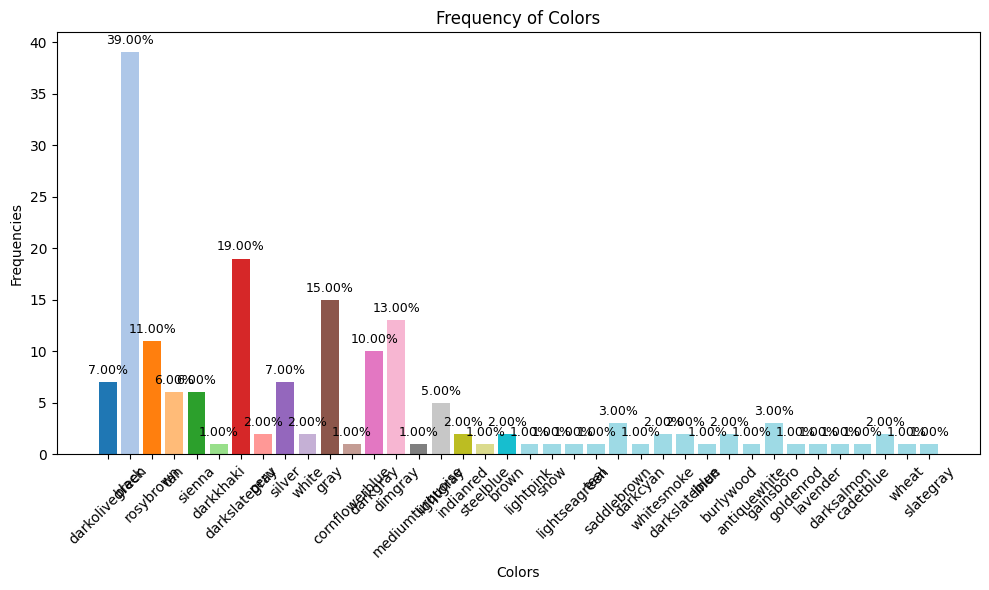

In [ ]:
palette = plt.get_cmap('tab20')

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars = plt.bar(colors, frequencies, color=palette(np.arange(len(colors))))

# Add labels and title
plt.xlabel('Colors')
plt.ylabel('Frequencies')
plt.title('Frequency of Colors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentages on top of each bar
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{freq:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
total = sum(color_frequency_dict.values())
percentages = {color: (freq / total) * 100 for color, freq in color_frequency_dict.items()}


In [ ]:
color_frequency_dict

{'darkolivegreen': 7,
 'black': 39,
 'rosybrown': 11,
 'tan': 6,
 'sienna': 6,
 'darkkhaki': 1,
 'darkslategray': 19,
 'peru': 2,
 'silver': 7,
 'white': 2,
 'gray': 15,
 'cornflowerblue': 1,
 'darkgray': 10,
 'dimgray': 13,
 'mediumturquoise': 1,
 'lightgray': 5,
 'indianred': 2,
 'steelblue': 1,
 'brown': 2,
 'lightpink': 1,
 'snow': 1,
 'lightseagreen': 1,
 'teal': 1,
 'saddlebrown': 3,
 'darkcyan': 1,
 'whitesmoke': 2,
 'darkslateblue': 2,
 'linen': 1,
 'burlywood': 2,
 'antiquewhite': 1,
 'gainsboro': 3,
 'goldenrod': 1,
 'lavender': 1,
 'darksalmon': 1,
 'cadetblue': 1,
 '': 2,
 'wheat': 1,
 'slategray': 1}

In [ ]:
import pandas as pd
from removebg import RemoveBg
import requests
from io import BytesIO
from PIL import Image
import os

# Your API key
API_KEY = "rMbVtYrt9fbeyDrHr3VtDy3k"

# Initialize RemoveBg with your API key
rmbg = RemoveBg(API_KEY, "error.log")

# Load your DataFrame
df = pd.read_csv('/content/image_data - Copy of timestamps.csv')

# Directory to save processed images
output_dir = "/content/processed_images"
os.makedirs(output_dir, exist_ok=True)

# Iterate through the DataFrame starting from the 19th row and process each image
for index, row in df.iloc[:].iterrows():  # Use iloc to start from the 19th row (index 18)
    image_url = row['ImageUrl']
    try:
        # Get the image from the URL
        response = requests.get(image_url)
        image = Image.open(BytesIO(response.content))

        # Save the image locally
        original_image_path = f"{output_dir}/original_image_{index}.png"
        image.save(original_image_path)

        # Use RemoveBg to remove the background
        rmbg.remove_background_from_img_file(original_image_path)

        print(f"Processed image {index} successfully.")

    except Exception as e:
        print(f"Error processing image {index}: {e}")

print("Background removal complete.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/image_data - Copy of timestamps.csv'

In [ ]:
pip install removebg


  Preparing metadata (setup.py) ... done
  Created wheel for removebg: filename=removebg-0.4-py3-none-any.whl size=2551 sha256=ad1aaec7a08ad3ca0f0d6d42a4a7bb2266996dff7d2da47e1987f1684598c990
  Stored in directory: /root/.cache/pip/wheels/43/c1/87/a6e48d11fa9e7aca90972e135247b70ddc8a0b4af464ac566a
Successfully built removebg
